# Fashion-Mnist Classification

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D


### load the data

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## some data information

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

## about the labels

In [8]:
unique, counts = np.unique(train_labels, return_counts=True)
dict(zip(unique, counts))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
dic=dict(zip(class_names,unique))
df = pd.DataFrame(dic.items())
df

,0,1
0,T-shirt/top,0
1,Trouser,1
2,Pullover,2
3,Dress,3
4,Coat,4
5,Sandal,5
6,Shirt,6
7,Sneaker,7
8,Bag,8
9,Ankle boot,9


### lets plot some images

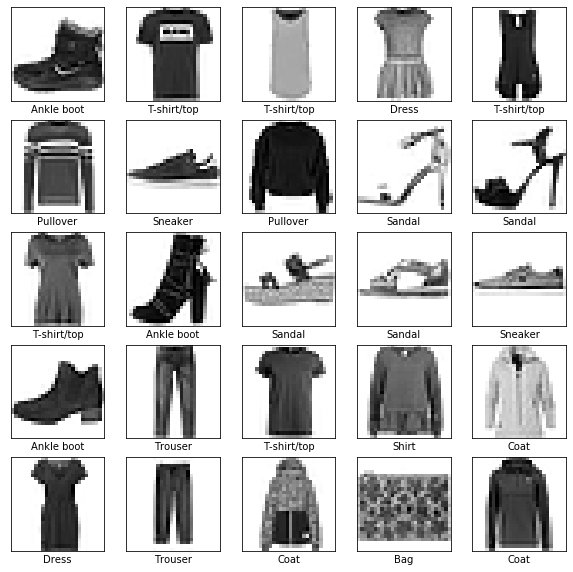

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# PCA

reshaping the form of the images for pca

In [11]:
from sklearn.decomposition import PCA
train_images = train_images.reshape(len(train_images),28*28)
test_images= test_images.reshape(len(test_images),28*28)

##### lets plot some sample (500) after pca transormation 
first with 3 components

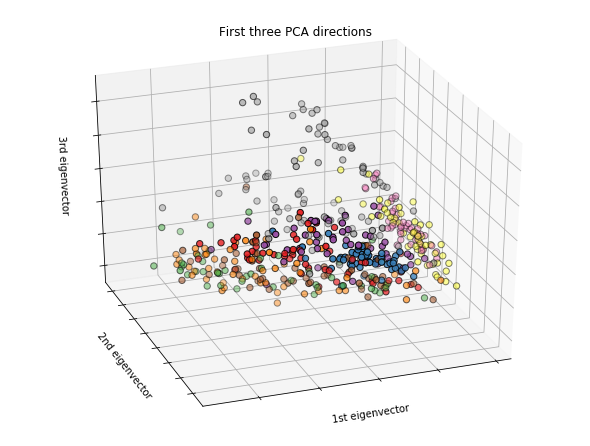

In [12]:
pca = PCA(n_components = 3)

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = pca.fit_transform(train_images.reshape(len(train_images),28*28))
ax.scatter(X_reduced[:500, 0], X_reduced[:500, 1], X_reduced[:500, 2], c=train_labels[:500],
           cmap=plt.cm.Set1, edgecolor='k', s=40 )
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

how many percent of the data are around the axis of the 3 components

In [13]:
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))


[0.29039228 0.1775531  0.06019222]
0.5281375988269666


lets do the same with 2 components

([], <a list of 0 Text yticklabel objects>)

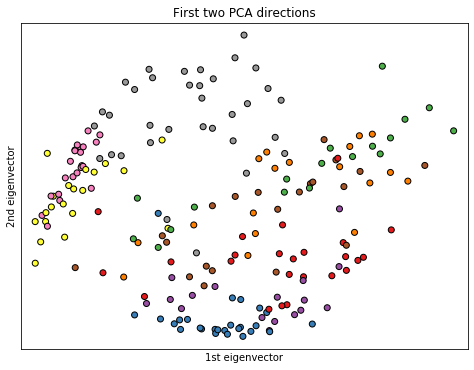

In [14]:
pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(train_images.reshape(len(train_images),28*28))

x_min, x_max = X_reduced[:200, 0].min() - 150, X_reduced[:200, 0].max() + 150
y_min, y_max = X_reduced[:200, 1].min() - 150, X_reduced[:200, 1].max() + 150

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X_reduced[:200, 0], X_reduced[:200, 1], c=train_labels[:200], cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
plt.title("First two PCA directions")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [15]:
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[0.29039228 0.1775531 ]
0.4679453789952783


### finding the optimal number of components

Text(0, 0.5, 'cumulative explained variance')

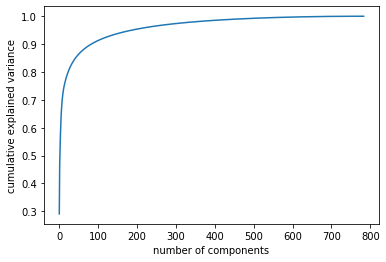

In [16]:
pca = PCA().fit(train_images.reshape(len(train_images),28*28))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

##### we can see that approximately after 100 components the curve no longer raise

lets take 100 components and fit and transform the data

In [17]:
pca=PCA(n_components = 100)
compressed_train_images = pca.fit_transform(train_images)
decompressed_train_images= pca.inverse_transform(compressed_train_images)
compressed_test_images = pca.transform(test_images)

and the result of the transformation

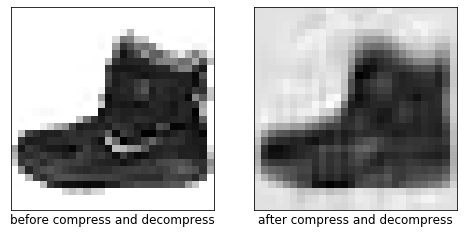

In [18]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)   
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.xlabel('before compress and decompress',fontsize=12)
plt.imshow(train_images[0].reshape(28,28), cmap=plt.cm.binary)

plt.subplot(1,2,2)   
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(decompressed_train_images[0].reshape(28,28), cmap=plt.cm.binary)
plt.xlabel('after compress and decompress', fontsize=12)
plt.show()

# Models

##### most of the models are training and testing first with the original data (28x28 pixels image) and after with the compressed data by PCA, the cross validation is apply on the compressed data 

In [19]:
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(train_images,train_labels)
print('knn Accuracy :',knn.score(test_images,test_labels),"\n")

y_pred = knn.predict(test_images)

print("Knn Matrix:")
print( confusion_matrix(test_labels,y_pred),"\n")
print("Classification Report:")
print(classification_report(test_labels, y_pred))


knn Accuracy : 0.8554 

Knn Matrix:
[[855   1  17  16   3   1 100   1   6   0]
 [  8 968   4  12   4   0   3   0   1   0]
 [ 24   2 819  11  75   0  69   0   0   0]
 [ 41   8  15 860  39   0  34   0   3   0]
 [  2   1 126  26 773   0  71   0   1   0]
 [  1   0   0   0   0 822   5  96   1  75]
 [176   1 132  23  80   0 575   0  13   0]
 [  0   0   0   0   0   3   0 961   0  36]
 [  2   0  10   4   7   0  16   7 953   1]
 [  0   0   0   0   0   2   1  29   0 968]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.82      0.77      1000
           3       0.90      0.86      0.88      1000
           4       0.79      0.77      0.78      1000
           5       0.99      0.82      0.90      1000
           6       0.66      0.57      0.61      1000
           7       0.88      0.96      0.92      1000
           8       0.

In [21]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=10,shuffle=True)

def display_scores(scores):
    print("Cross Validation Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(compressed_train_images,train_labels)
print('knn Accuracy with PCA :',knn.score(compressed_test_images,test_labels),"\n")

y_pred = knn.predict(compressed_test_images)

print("Knn Matrix with PCA:")
print( confusion_matrix(test_labels,y_pred),"\n")
print("Classification Report:")
print(classification_report(test_labels, y_pred))


knn Accuracy with PCA : 0.8625 

Knn Matrix with PCA:
[[841   1  14  18   6   1 109   1   9   0]
 [  6 969   4  13   5   0   2   0   1   0]
 [ 21   2 791  12 103   0  70   0   1   0]
 [ 35   6  14 881  37   0  24   0   3   0]
 [  2   2 114  23 785   0  70   0   4   0]
 [  0   0   0   0   0 894   0  57   2  47]
 [169   3 125  21  92   0 579   0  11   0]
 [  0   0   0   0   0   8   0 952   0  40]
 [  3   0   5   5   4   2  10   5 965   1]
 [  0   0   0   0   0   2   0  29   1 968]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.74      0.79      0.77      1000
           3       0.91      0.88      0.89      1000
           4       0.76      0.79      0.77      1000
           5       0.99      0.89      0.94      1000
           6       0.67      0.58      0.62      1000
           7       0.91      0.95      0.93      1000
   

In [23]:
scores = cross_val_score(knn,compressed_train_images,train_labels,cv=kf)
display_scores(scores)


Cross Validation Scores: [0.869      0.86383333 0.86366667 0.85933333 0.86583333 0.864
 0.85766667 0.86133333 0.86466667 0.86733333]
Mean: 0.8636666666666665
Standard deviation: 0.003285489985442728


# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

lgr=LogisticRegression()
lgr.fit(train_images,train_labels)
print('Logistic Regression Accuracy :', lgr.score(test_images,test_labels),"\n")

y_pred = lgr.predict(test_images)

print("Logistic Regression Matrix:")
print( confusion_matrix(test_labels,y_pred),"\n")
print("Classification Report:")
print(classification_report(test_labels, y_pred))

Logistic Regression Accuracy : 0.8412 

Logistic Regression Matrix:
[[812   5  16  46   9   0  98   0  14   0]
 [  2 960   1  27   4   0   4   0   2   0]
 [ 18   6 737  11 140   1  78   0   9   0]
 [ 25  15  15 858  44   1  37   0   5   0]
 [  0   3 106  33 779   1  70   0   8   0]
 [  1   1   0   0   0 891   0  56   9  42]
 [139   3 129  42 114   0 550   0  23   0]
 [  0   0   0   0   0  36   0 933   0  31]
 [  3   1   7  10   2   3  21   5 947   1]
 [  0   0   0   0   0  13   0  39   3 945]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1000
           1       0.97      0.96      0.96      1000
           2       0.73      0.74      0.73      1000
           3       0.84      0.86      0.85      1000
           4       0.71      0.78      0.74      1000
           5       0.94      0.89      0.92      1000
           6       0.64      0.55      0.59      1000
           7       0.90      0.93      0.92

In [25]:
lgr.fit(compressed_train_images,train_labels)
print('Logistic Regression  Accuracy with PCA :',lgr.score(compressed_test_images,test_labels),"\n")

y_pred = lgr.predict(compressed_test_images)

print("Logistic Regression  Matrix with PCA:")
print( confusion_matrix(test_labels,y_pred),"\n")
print("Classification Report:")
print(classification_report(test_labels, y_pred))

Logistic Regression  Accuracy with PCA : 0.8376 

Logistic Regression  Matrix with PCA:
[[824   2  14  52   7   4  86   0  11   0]
 [  3 957   6  27   4   0   2   0   1   0]
 [ 18   6 726   9 131   2  99   2   6   1]
 [ 32  14   8 866  27   4  43   1   5   0]
 [  0   1 106  46 739   2  97   2   7   0]
 [  0   0   0   0   0 922   0  53   6  19]
 [148   2 130  40 116   2 538   0  24   0]
 [  0   0   0   0   0  35   0 929   0  36]
 [  6   2   6  10   3   7  21   8 934   3]
 [  0   0   0   0   0  16   0  42   1 941]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1000
           1       0.97      0.96      0.96      1000
           2       0.73      0.73      0.73      1000
           3       0.82      0.87      0.84      1000
           4       0.72      0.74      0.73      1000
           5       0.93      0.92      0.92      1000
           6       0.61      0.54      0.57      1000
           7       0.90

In [26]:
scores = cross_val_score(lgr,compressed_train_images,train_labels,cv=kf)
display_scores(scores)

Cross Validation Scores: [0.8475     0.85533333 0.8545     0.85283333 0.83533333 0.841
 0.84216667 0.8495     0.8515     0.85183333]
Mean: 0.8481500000000001
Standard deviation: 0.006261633617160585


# Gaussian Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(train_images,train_labels)
print('Naive Bayes Accuracy : ', nb.score(test_images,test_labels),"\n")

y_pred = nb.predict(test_images)
print("Naive Bayes Matrix:")
print( confusion_matrix(test_labels,y_pred),"\n")
print("Classification Report:")
print(classification_report(test_labels, y_pred))

Naive Bayes Accuracy :  0.5856 

Naive Bayes Matrix:
[[586  64  29 162 110   0  20   0  29   0]
 [  1 939  14  36   7   0   1   0   2   0]
 [  7  14 324  65 545   0  23   0  22   0]
 [  9 387   6 545  43   0   4   0   6   0]
 [  0  34  44 131 779   0   4   0   8   0]
 [  0   0   1   1   0 278   3 660   5  52]
 [117  34 112 200 435   0  40   0  62   0]
 [  0   0   0   0   0   3   0 988   0   9]
 [  0   2  19  85 149   3  27   4 710   1]
 [  0   0   1   1   0  16   3 304   8 667]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.59      0.68      1000
           1       0.64      0.94      0.76      1000
           2       0.59      0.32      0.42      1000
           3       0.44      0.55      0.49      1000
           4       0.38      0.78      0.51      1000
           5       0.93      0.28      0.43      1000
           6       0.32      0.04      0.07      1000
           7       0.51      0.99      0.67      1000
    

In [28]:
nb.fit(compressed_train_images,train_labels)
print('Naive Bayes Accuracy with PCA :',nb.score(compressed_test_images,test_labels),"\n")

y_pred = nb.predict(compressed_test_images)

print("Naive Bayes  Matrix with PCA:")
print( confusion_matrix(test_labels,y_pred),"\n")
print("Classification Report:")
print(classification_report(test_labels, y_pred))

Naive Bayes Accuracy with PCA : 0.7586 

Naive Bayes  Matrix with PCA:
[[744   1  21  62   8   4  78   0  82   0]
 [ 11 888  16  50   2   2  15   0  16   0]
 [ 17   0 606   8 122   4 176   0  67   0]
 [ 53   5  11 788  28   9  63   0  43   0]
 [  3   0 121  31 651   2 145   0  47   0]
 [  1   0   0   1   0 746  34 163  38  17]
 [170   0 105  37  73   5 518   1  91   0]
 [  1   0   0   0   0  47   2 878   1  71]
 [ 19   0   7   5   6  17  38  33 874   1]
 [  0   0   0   0   0  22   5  62  18 893]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1000
           1       0.99      0.89      0.94      1000
           2       0.68      0.61      0.64      1000
           3       0.80      0.79      0.80      1000
           4       0.73      0.65      0.69      1000
           5       0.87      0.75      0.80      1000
           6       0.48      0.52      0.50      1000
           7       0.77      0.88      0

##### better score with pca 

In [29]:
scores = cross_val_score(nb,compressed_train_images,train_labels,cv=kf)
display_scores(scores)

Cross Validation Scores: [0.7685     0.7785     0.7695     0.7595     0.76616667 0.782
 0.76616667 0.77666667 0.772      0.7555    ]
Mean: 0.76945
Standard deviation: 0.007836187423315853


# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(train_images,train_labels)
print('Decision Tree Accuracy : ', dt.score(test_images,test_labels),"\n")

y_pred = dt.predict(test_images)

print("Decision Tree Matrix:")
print(confusion_matrix(test_labels,y_pred),"\n")
print("Classification Report:")
print(classification_report(test_labels, y_pred))

Decision Tree Accuracy :  0.7924 

Decision Tree Matrix:
[[744   1  32  45   9   1 152   1  14   1]
 [  7 947   4  21   7   0  11   0   2   1]
 [ 24   2 646  20 150   1 142   0  12   3]
 [ 49  31  22 779  53   0  55   0  11   0]
 [ 14   3 175  52 635   0 113   0   8   0]
 [  0   3   3   2   0 885   0  59  19  29]
 [135   6 131  38 105   6 563   0  15   1]
 [  0   0   0   0   0  42   0 895   6  57]
 [  7   1  11   7  11  14  18   4 921   6]
 [  2   0   1   0   1  22   0  61   4 909]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1000
           1       0.95      0.95      0.95      1000
           2       0.63      0.65      0.64      1000
           3       0.81      0.78      0.79      1000
           4       0.65      0.64      0.64      1000
           5       0.91      0.89      0.90      1000
           6       0.53      0.56      0.55      1000
           7       0.88      0.90      0.89      1000


In [31]:
dt=DecisionTreeClassifier()
dt.fit(compressed_train_images,train_labels)
print('Decision Tree Accuracy with PCA : ', dt.score(compressed_test_images,test_labels),"\n")

y_pred = dt.predict(compressed_test_images)

print("Decision Tree with PCA Matrix:")
print(confusion_matrix(test_labels,y_pred),"\n")
print("Classification Report:")
print(classification_report(test_labels, y_pred))

Decision Tree Accuracy with PCA :  0.7639 

Decision Tree with PCA Matrix:
[[724  12  27  48  19   6 153   0  10   1]
 [ 11 936   4  32   7   0   8   0   2   0]
 [ 36   6 640  27 140   3 126   1  20   1]
 [ 52  24  25 777  56   1  51   0  13   1]
 [ 10   1 174  49 622   3 132   0   7   2]
 [  2   1   3   5   3 838   5  90  12  41]
 [155   9 133  45 131   2 496   1  28   0]
 [  0   0   1   0   0  78   1 845   6  69]
 [  9   2  23  10  15  16  27   9 886   3]
 [  1   0   1   1   0  38   1  77   6 875]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1000
           1       0.94      0.94      0.94      1000
           2       0.62      0.64      0.63      1000
           3       0.78      0.78      0.78      1000
           4       0.63      0.62      0.62      1000
           5       0.85      0.84      0.84      1000
           6       0.50      0.50      0.50      1000
           7       0.83      0.84   

In [32]:
scores = cross_val_score(dt,compressed_train_images,train_labels,cv=kf)
display_scores(scores)

Cross Validation Scores: [0.76783333 0.76416667 0.7625     0.77616667 0.76266667 0.76716667
 0.7665     0.762      0.77516667 0.7565    ]
Mean: 0.7660666666666667
Standard deviation: 0.0057034102858631


# SVC

In [33]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(train_images,train_labels)
print('SVM Accuracy : ', svm.score(test_images,test_labels),"\n")

y_pred = svm.predict(test_images)

print("SVM Matrix:")
print(confusion_matrix(test_labels,y_pred),"\n")
print("Classification Report:")
print(classification_report(test_labels, y_pred))

SVM Accuracy :  0.8828 

SVM Matrix:
[[857   0  16  28   3   2  85   0   9   0]
 [  4 962   2  25   3   0   4   0   0   0]
 [ 11   2 816  16  88   0  65   0   2   0]
 [ 27   3  11 890  33   0  32   0   4   0]
 [  1   1  87  32 815   0  61   0   3   0]
 [  0   0   0   1   0 951   0  33   1  14]
 [135   1 104  27  68   0 654   0  11   0]
 [  0   0   0   0   0  21   0 955   0  24]
 [  3   1   1   5   2   2   4   5 977   0]
 [  0   0   0   0   0  11   1  37   0 951]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.79      0.82      0.80      1000
           3       0.87      0.89      0.88      1000
           4       0.81      0.81      0.81      1000
           5       0.96      0.95      0.96      1000
           6       0.72      0.65      0.69      1000
           7       0.93      0.95      0.94      1000
           8       0

In [34]:
svm.fit(compressed_train_images,train_labels)
print('SVM Accuracy with PCA : ', svm.score(compressed_test_images,test_labels),"\n")

y_pred = svm.predict(compressed_test_images)

print("SVM with PCA Matrix:")
print(confusion_matrix(test_labels,y_pred),"\n")
print("Classification Report:")
print(classification_report(test_labels, y_pred))

SVM Accuracy with PCA :  0.8827 

SVM with PCA Matrix:
[[860   0   9  27   4   2  92   0   6   0]
 [  4 962   0  26   3   0   5   0   0   0]
 [ 13   1 802  13  97   0  73   0   1   0]
 [ 24   3  12 893  33   0  31   0   4   0]
 [  0   0  88  30 816   0  64   0   2   0]
 [  0   0   0   1   0 951   0  36   1  11]
 [133   1  96  26  70   0 660   0  14   0]
 [  0   0   0   0   0  18   0 957   0  25]
 [  4   0   0   8   2   3   5   5 973   0]
 [  0   0   0   0   0   9   1  37   0 953]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.80      0.80      0.80      1000
           3       0.87      0.89      0.88      1000
           4       0.80      0.82      0.81      1000
           5       0.97      0.95      0.96      1000
           6       0.71      0.66      0.68      1000
           7       0.92      0.96      0.94      1000
  

# Ensemble Learning 

## Voting Classifier with knn , log regression and svc
##### voting hard

In [35]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
 estimators=[('lr', lgr), ('knn', knn), ('svc', svm)],
 voting='hard')

voting_clf.fit(compressed_train_images, train_labels)
print('Voting Accuracy with PCA : ', voting_clf.score(compressed_test_images,test_labels),"\n")

y_pred = voting_clf.predict(compressed_test_images)

print("Voting with PCA Matrix:")
print(confusion_matrix(test_labels,y_pred),"\n")
print("Classification Report:")
print(classification_report(test_labels, y_pred))

Voting Accuracy with PCA :  0.8764 

Voting with PCA Matrix:
[[867   0  11  22   2   2  88   0   8   0]
 [  6 962   2  24   3   0   3   0   0   0]
 [ 20   4 809  10  98   0  57   0   2   0]
 [ 32   3  15 890  30   0  27   0   3   0]
 [  0   2  93  33 809   0  60   0   3   0]
 [  0   0   0   0   0 944   0  38   2  16]
 [161   2 114  25  79   0 606   0  13   0]
 [  0   0   0   0   0  17   0 955   0  28]
 [  4   0   1   8   1   4   7   6 969   0]
 [  0   0   0   0   0   9   0  37   1 953]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.77      0.81      0.79      1000
           3       0.88      0.89      0.88      1000
           4       0.79      0.81      0.80      1000
           5       0.97      0.94      0.96      1000
           6       0.71      0.61      0.66      1000
           7       0.92      0.95      0.94      1

##### voting soft

In [36]:

svm = SVC(probability=True)

voting_clf = VotingClassifier(
 estimators=[('lr', lgr), ('knn', knn), ('svc', svm)],
 voting='soft')

voting_clf.fit(compressed_train_images, train_labels)
print('Voting Accuracy with PCA : ', voting_clf.score(compressed_test_images,test_labels),"\n")

y_pred = voting_clf.predict(compressed_test_images)

print("Voting with PCA Matrix:")
print(confusion_matrix(test_labels,y_pred),"\n")
print("Classification Report:")
print(classification_report(test_labels, y_pred))

Voting Accuracy with PCA :  0.8821 

Voting with PCA Matrix:
[[861   0  10  23   4   1  90   1  10   0]
 [  4 966   2  21   3   0   3   0   1   0]
 [ 17   0 800  11 100   0  68   1   3   0]
 [ 18   4  10 901  28   1  34   0   4   0]
 [  0   0  85  31 813   0  68   0   3   0]
 [  0   0   0   0   0 946   0  36   1  17]
 [139   1  93  27  79   0 642   0  19   0]
 [  0   0   0   0   0  15   0 957   0  28]
 [  0   1   0   5   2   3  10   4 975   0]
 [  0   0   0   0   0   6   0  33   1 960]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.80      0.80      1000
           3       0.88      0.90      0.89      1000
           4       0.79      0.81      0.80      1000
           5       0.97      0.95      0.96      1000
           6       0.70      0.64      0.67      1000
           7       0.93      0.96      0.94      1

# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

rnf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

rnf.fit(compressed_train_images, train_labels)
print('Random Forest with PCA : ', rnf.score(compressed_test_images,test_labels),"\n")

y_pred = rnf.predict(compressed_test_images)

print("Random Forest with PCA Matrix:")
print(confusion_matrix(test_labels,y_pred),"\n")
print("Classification Report:")
print(classification_report(test_labels, y_pred))

Random Forest with PCA :  0.7431 

Random Forest with PCA Matrix:
[[775   4  20 106  11  29  22   0  32   1]
 [ 13 917   7  52   7   2   0   0   2   0]
 [ 44   2 636  11 181   9  67   1  48   1]
 [ 48  16   2 816  60  16  28   1  11   2]
 [  3   2 175  38 693  10  42   0  37   0]
 [  2   0   1   2   6 781   4 107  23  74]
 [260   2 162  65 184  41 219   0  67   0]
 [  2   0   0   0   1 126   0 788   7  76]
 [  9   2   7   7  10  28   8   9 918   2]
 [  0   0   1   0   0  61   0  47   3 888]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.78      0.72      1000
           1       0.97      0.92      0.94      1000
           2       0.63      0.64      0.63      1000
           3       0.74      0.82      0.78      1000
           4       0.60      0.69      0.64      1000
           5       0.71      0.78      0.74      1000
           6       0.56      0.22      0.32      1000
           7       0.83      0.79      0.81  

In [38]:
rnf.fit(train_images,train_labels)
print('Random Forest Accuracy : ', rnf.score(test_images,test_labels),"\n")

y_pred = rnf.predict(test_images)

print("Random Forest Matrix:")
print(confusion_matrix(test_labels,y_pred),"\n")
print("Classification Report:")
print(classification_report(test_labels, y_pred))

Random Forest Accuracy :  0.7564 

Random Forest Matrix:
[[780   7  51 121   8   1   7   0  25   0]
 [  1 847  21 125   3   0   1   0   2   0]
 [ 13   0 690  12 270   0   3   0  12   0]
 [ 30   8  39 880  33   0   5   0   5   0]
 [  0   2 153 100 731   3   5   0   6   0]
 [  0   0   0   4   0 829   0  89   9  69]
 [216   4 205 124 341   1  65   0  44   0]
 [  0   0   0   0   0  14   0 889   0  97]
 [  2   2  38  21   4  10   0   6 917   0]
 [  0   0   0   0   0   7   0  53   4 936]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.76      1000
           1       0.97      0.85      0.91      1000
           2       0.58      0.69      0.63      1000
           3       0.63      0.88      0.74      1000
           4       0.53      0.73      0.61      1000
           5       0.96      0.83      0.89      1000
           6       0.76      0.07      0.12      1000
           7       0.86      0.89      0.87      1000


##### lets plot the pixels importance with RandomForest feature_importances

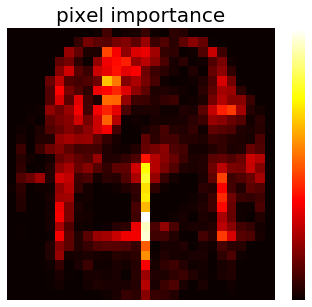

In [68]:
importances = rnf.feature_importances_
importances = importances.reshape(28,28)
plt.figure(figsize=(6,5))
plt.title('pixel importance',fontsize=20)
sns.heatmap(importances,cmap='hot' ,annot=False,xticklabels=False, yticklabels=False,cbar_kws=dict(ticks=[]))


# AdaBoost

In [71]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=200, algorithm="SAMME.R")

adb.fit(compressed_train_images, train_labels)
print('AdaBoost with PCA : ', adb.score(compressed_test_images,test_labels),"\n")

y_pred = adb.predict(compressed_test_images)

print("AdaBoost with PCA Matrix:")
print(confusion_matrix(test_labels,y_pred),"\n")
print("Classification Report:")
print(classification_report(test_labels, y_pred))

AdaBoost with PCA :  0.7614 

AdaBoost with PCA Matrix:
[[720  10  28  52  20   5 153   0  11   1]
 [ 15 932   5  27   9   1  10   0   1   0]
 [ 34   9 649  21 151   3 111   1  21   0]
 [ 50  32  22 765  65   3  50   1  11   1]
 [  4   6 176  50 611   2 142   0   7   2]
 [  1   1   0   5   0 837   4  85  21  46]
 [156   7 135  51 131   5 490   1  24   0]
 [  1   0   0   1   0  75   0 844   5  74]
 [  8   2  26   8  15  18  25   7 888   3]
 [  0   0   0   0   0  45   2  71   4 878]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.72      0.72      1000
           1       0.93      0.93      0.93      1000
           2       0.62      0.65      0.64      1000
           3       0.78      0.77      0.77      1000
           4       0.61      0.61      0.61      1000
           5       0.84      0.84      0.84      1000
           6       0.50      0.49      0.49      1000
           7       0.84      0.84      0.84      1000
 